TODO
- visualize what loss looks like with iterations
- create separate model for rejector and change loss function to learn from rejector

In [1]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
from tqdm import tqdm
import torch
sns.set_style("darkgrid")
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

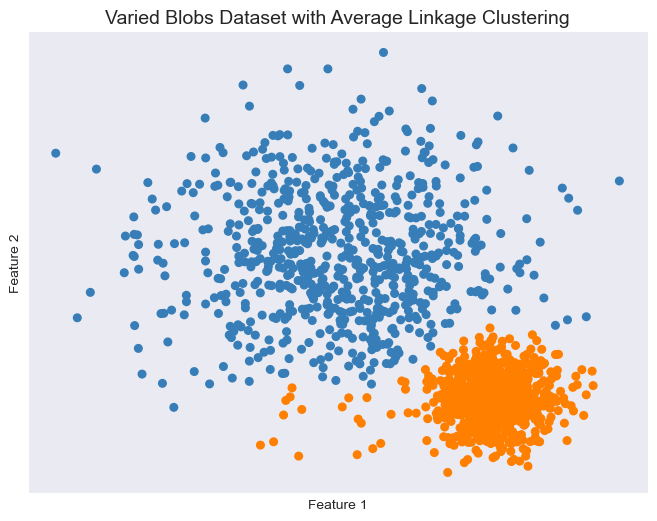

In [68]:
# Varied blobs dataset
n_samples = 1500
varied = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=[7.5, 2.5])

X, y = varied # y binary 0,1

# Normalize the dataset (from scikit learn website)
X_normalized = StandardScaler().fit_transform(X)

# Agglomerative Clustering object with Average Linkage (from scikit learn website)
n_clusters = 2  # Number of clusters
average_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')

# Fit data and cluster
cluster_labels = average_clustering.fit_predict(X_normalized)

# Visualize clusters
plt.figure(figsize=(8, 6))

# Plot cluster
colors = np.array(['#377eb8', '#ff7f00', '#4daf4a'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=colors[cluster_labels])

plt.title('Varied Blobs Dataset with Average Linkage Clustering', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xticks(())
plt.yticks(())

plt.show()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=456)

In [75]:
epochs = 200_000
input_dim = 2 # Two inputs x1 and x2 
output_dim = 1 # Two possible outputs
learning_rate = 0.01

model = LogisticRegression(input_dim,output_dim)

criterion = torch.nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train),torch.Tensor(y_test)

losses = []
losses_test = []
Iterations = []
iter = 0

In [76]:
for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) # [200,1] -squeeze-> [200]
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves 
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    iter+=1
    if iter%10000==0:
        # calculate Accuracy
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

Training Epochs:   6%|▌         | 11645/200000 [00:00<00:14, 13250.08it/s]

Iteration: 10000. 
Test - Loss: 0.08976645767688751. Accuracy: 97.55555555555556
Train -  Loss: 0.09902971237897873. Accuracy: 97.33333333333333



Training Epochs:  11%|█         | 22404/200000 [00:01<00:13, 13524.72it/s]

Iteration: 20000. 
Test - Loss: 0.08145703375339508. Accuracy: 97.77777777777777
Train -  Loss: 0.0898749828338623. Accuracy: 97.61904761904762



Training Epochs:  16%|█▌        | 31787/200000 [00:02<00:12, 13429.64it/s]

Iteration: 30000. 
Test - Loss: 0.07855995744466782. Accuracy: 97.77777777777777
Train -  Loss: 0.08663907647132874. Accuracy: 97.71428571428571



Training Epochs:  21%|██        | 41378/200000 [00:03<00:11, 13607.81it/s]

Iteration: 40000. 
Test - Loss: 0.0771804228425026. Accuracy: 97.77777777777777
Train -  Loss: 0.08506923168897629. Accuracy: 97.71428571428571



Training Epochs:  26%|██▌       | 52301/200000 [00:03<00:10, 13659.08it/s]

Iteration: 50000. 
Test - Loss: 0.0764249786734581. Accuracy: 97.77777777777777
Train -  Loss: 0.08418994396924973. Accuracy: 97.71428571428571



Training Epochs:  31%|███       | 61947/200000 [00:04<00:10, 13626.56it/s]

Iteration: 60000. 
Test - Loss: 0.07597709447145462. Accuracy: 97.77777777777777
Train -  Loss: 0.08365495502948761. Accuracy: 97.71428571428571



Training Epochs:  36%|███▌      | 71437/200000 [00:05<00:09, 13537.09it/s]

Iteration: 70000. 
Test - Loss: 0.07569824159145355. Accuracy: 97.77777777777777
Train -  Loss: 0.08331133425235748. Accuracy: 97.71428571428571



Training Epochs:  41%|████      | 82436/200000 [00:06<00:08, 13590.03it/s]

Iteration: 80000. 
Test - Loss: 0.07551953941583633. Accuracy: 97.77777777777777
Train -  Loss: 0.08308222889900208. Accuracy: 97.71428571428571



Training Epochs:  46%|████▌     | 92130/200000 [00:06<00:07, 13829.07it/s]

Iteration: 90000. 
Test - Loss: 0.07540177553892136. Accuracy: 97.77777777777777
Train -  Loss: 0.08292445540428162. Accuracy: 97.71428571428571



Training Epochs:  51%|█████     | 101904/200000 [00:07<00:07, 13961.77it/s]

Iteration: 100000. 
Test - Loss: 0.07532095909118652. Accuracy: 97.77777777777777
Train -  Loss: 0.08281496912240982. Accuracy: 97.9047619047619



Training Epochs:  56%|█████▌    | 111721/200000 [00:08<00:06, 14031.13it/s]

Iteration: 110000. 
Test - Loss: 0.07526925206184387. Accuracy: 97.77777777777777
Train -  Loss: 0.08273624628782272. Accuracy: 97.9047619047619



Training Epochs:  61%|██████    | 121545/200000 [00:08<00:05, 13818.34it/s]

Iteration: 120000. 
Test - Loss: 0.0752316489815712. Accuracy: 97.77777777777777
Train -  Loss: 0.08267983049154282. Accuracy: 97.9047619047619



Training Epochs:  66%|██████▋   | 132714/200000 [00:09<00:04, 13893.66it/s]

Iteration: 130000. 
Test - Loss: 0.07521165907382965. Accuracy: 97.77777777777777
Train -  Loss: 0.08263909071683884. Accuracy: 97.9047619047619



Training Epochs:  71%|███████▏  | 142504/200000 [00:10<00:04, 14007.98it/s]

Iteration: 140000. 
Test - Loss: 0.07519606500864029. Accuracy: 97.77777777777777
Train -  Loss: 0.08260878920555115. Accuracy: 97.9047619047619



Training Epochs:  76%|███████▌  | 152322/200000 [00:11<00:03, 13998.22it/s]

Iteration: 150000. 
Test - Loss: 0.0751843973994255. Accuracy: 97.77777777777777
Train -  Loss: 0.08258598297834396. Accuracy: 97.9047619047619



Training Epochs:  81%|████████  | 162125/200000 [00:11<00:02, 13997.70it/s]

Iteration: 160000. 
Test - Loss: 0.07517370581626892. Accuracy: 97.77777777777777
Train -  Loss: 0.0825696587562561. Accuracy: 97.9047619047619



Training Epochs:  86%|████████▌ | 171995/200000 [00:12<00:01, 14104.65it/s]

Iteration: 170000. 
Test - Loss: 0.07517223060131073. Accuracy: 97.77777777777777
Train -  Loss: 0.08255747705698013. Accuracy: 97.9047619047619



Training Epochs:  91%|█████████ | 181877/200000 [00:13<00:01, 14102.76it/s]

Iteration: 180000. 
Test - Loss: 0.07517138123512268. Accuracy: 97.77777777777777
Train -  Loss: 0.08254752308130264. Accuracy: 97.9047619047619



Training Epochs:  96%|█████████▌| 191721/200000 [00:14<00:00, 13961.53it/s]

Iteration: 190000. 
Test - Loss: 0.07517115026712418. Accuracy: 97.77777777777777
Train -  Loss: 0.08254072070121765. Accuracy: 97.9047619047619



Training Epochs: 100%|██████████| 200000/200000 [00:14<00:00, 13702.19it/s]

Iteration: 200000. 
Test - Loss: 0.07516910135746002. Accuracy: 97.77777777777777
Train -  Loss: 0.08253485709428787. Accuracy: 97.9047619047619



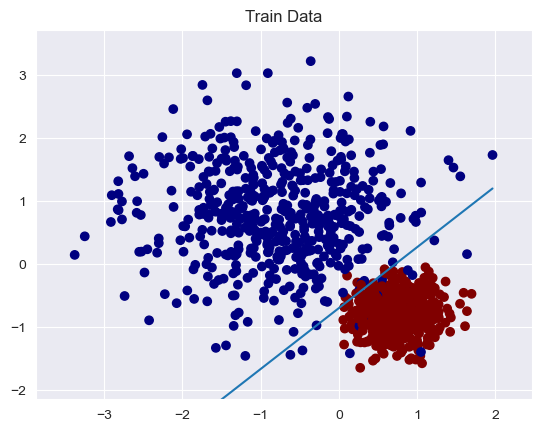

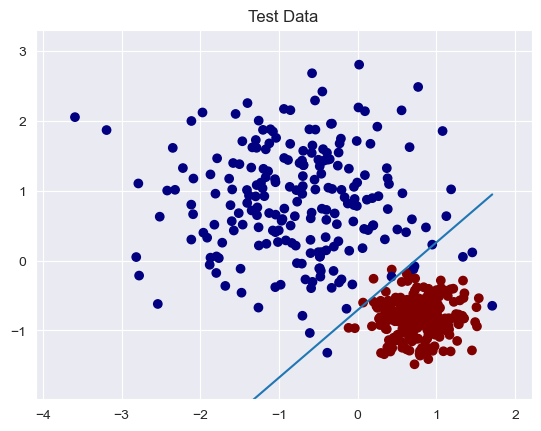

In [77]:
# Train Data
model_plot(model,X_train,y_train,'Train Data')

# Test Dataset Results
model_plot(model,X_test,y_test,'Test Data')

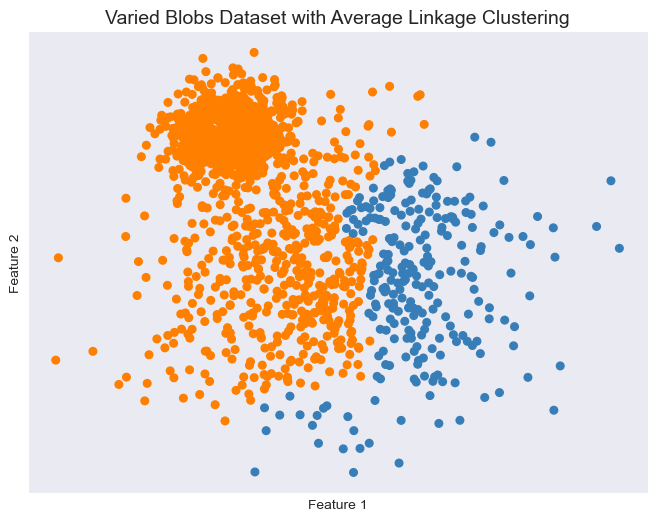

In [161]:
# Varied blobs dataset
n_samples = 1500
varied = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=2, cluster_std=[2.5, 7.5], random_state=55)

X, y = varied # y binary 0,1

# Normalize the dataset (from scikit learn website)
X_normalized = StandardScaler().fit_transform(X)

# Agglomerative Clustering object with Average Linkage (from scikit learn website)
n_clusters = 2  # Number of clusters
average_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')

# Fit data and cluster
cluster_labels = average_clustering.fit_predict(X_normalized)

# Visualize clusters
plt.figure(figsize=(8, 6))

# Plot cluster
colors = np.array(['#377eb8', '#ff7f00', '#4daf4a'])
plt.scatter(X[:, 0], X[:, 1], s=30, color=colors[cluster_labels])

plt.title('Varied Blobs Dataset with Average Linkage Clustering', fontsize=14)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xticks(())
plt.yticks(())

plt.show()

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=55)

In [163]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [164]:
epochs = 200_000
input_dim = 2 # Two inputs x1 and x2 
output_dim = 1 # Two possible outputs
learning_rate = 0.01

model = LogisticRegression(input_dim,output_dim)

criterion = torch.nn.BCELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

X_train, X_test = torch.Tensor(X_train),torch.Tensor(X_test)
y_train, y_test = torch.Tensor(y_train),torch.Tensor(y_test)

losses = []
losses_test = []
Iterations = []
iter = 0

In [165]:
for epoch in tqdm(range(int(epochs)),desc='Training Epochs'):
    x = X_train
    labels = y_train
    optimizer.zero_grad() # Setting our stored gradients equal to zero
    outputs = model(X_train)
    loss = criterion(torch.squeeze(outputs), labels) # [200,1] -squeeze-> [200]
    
    loss.backward() # Computes the gradient of the given tensor w.r.t. graph leaves 
    
    optimizer.step() # Updates weights and biases with the optimizer (SGD)
    
    iter+=1
    if iter%10000==0:
        # calculate Accuracy
        with torch.no_grad():
            # Calculating the loss and accuracy for the test dataset
            correct_test = 0
            total_test = 0
            outputs_test = torch.squeeze(model(X_test))
            loss_test = criterion(outputs_test, y_test)
            
            predicted_test = outputs_test.round().detach().numpy()
            total_test += y_test.size(0)
            correct_test += np.sum(predicted_test == y_test.detach().numpy())
            accuracy_test = 100 * correct_test/total_test
            losses_test.append(loss_test.item())
            
            # Calculating the loss and accuracy for the train dataset
            total = 0
            correct = 0
            total += y_train.size(0)
            correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == y_train.detach().numpy())
            accuracy = 100 * correct/total
            losses.append(loss.item())
            Iterations.append(iter)
            
            print(f"Iteration: {iter}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
            print(f"Train -  Loss: {loss.item()}. Accuracy: {accuracy}\n")

Training Epochs:   6%|▌         | 12239/200000 [00:00<00:13, 13877.04it/s]

Iteration: 10000. 
Test - Loss: 0.1039997935295105. Accuracy: 97.55555555555556
Train -  Loss: 0.15671655535697937. Accuracy: 95.52380952380952



Training Epochs:  11%|█         | 21896/200000 [00:01<00:13, 13487.49it/s]

Iteration: 20000. 
Test - Loss: 0.09332726895809174. Accuracy: 97.55555555555556
Train -  Loss: 0.14813752472400665. Accuracy: 95.23809523809524



Training Epochs:  16%|█▌        | 31408/200000 [00:02<00:12, 13564.08it/s]

Iteration: 30000. 
Test - Loss: 0.08941648155450821. Accuracy: 97.55555555555556
Train -  Loss: 0.14563792943954468. Accuracy: 95.33333333333333



Training Epochs:  21%|██▏       | 42637/200000 [00:03<00:11, 13991.02it/s]

Iteration: 40000. 
Test - Loss: 0.08742592483758926. Accuracy: 97.55555555555556
Train -  Loss: 0.14464890956878662. Accuracy: 95.33333333333333



Training Epochs:  26%|██▌       | 52456/200000 [00:03<00:10, 13961.44it/s]

Iteration: 50000. 
Test - Loss: 0.08625616133213043. Accuracy: 97.33333333333333
Train -  Loss: 0.14420118927955627. Accuracy: 95.14285714285714



Training Epochs:  31%|███       | 61752/200000 [00:04<00:10, 12901.69it/s]

Iteration: 60000. 
Test - Loss: 0.08551070094108582. Accuracy: 97.33333333333333
Train -  Loss: 0.14398279786109924. Accuracy: 95.14285714285714



Training Epochs:  36%|███▌      | 71309/200000 [00:05<00:09, 13336.57it/s]

Iteration: 70000. 
Test - Loss: 0.08501160144805908. Accuracy: 97.33333333333333
Train -  Loss: 0.14387117326259613. Accuracy: 95.04761904761905



Training Epochs:  41%|████      | 82429/200000 [00:06<00:08, 13901.55it/s]

Iteration: 80000. 
Test - Loss: 0.08466648310422897. Accuracy: 97.33333333333333
Train -  Loss: 0.143812358379364. Accuracy: 95.23809523809524



Training Epochs:  46%|████▌     | 92309/200000 [00:06<00:07, 14087.63it/s]

Iteration: 90000. 
Test - Loss: 0.08442310243844986. Accuracy: 97.33333333333333
Train -  Loss: 0.14378079771995544. Accuracy: 95.23809523809524



Training Epochs:  51%|█████     | 102154/200000 [00:07<00:07, 13904.36it/s]

Iteration: 100000. 
Test - Loss: 0.08424750715494156. Accuracy: 97.33333333333333
Train -  Loss: 0.14376355707645416. Accuracy: 95.33333333333333



Training Epochs:  56%|█████▌    | 111576/200000 [00:08<00:06, 13150.75it/s]

Iteration: 110000. 
Test - Loss: 0.08411899209022522. Accuracy: 97.33333333333333
Train -  Loss: 0.14375393092632294. Accuracy: 95.33333333333333



Training Epochs:  61%|██████▏   | 122598/200000 [00:09<00:05, 13826.95it/s]

Iteration: 120000. 
Test - Loss: 0.08402597159147263. Accuracy: 97.33333333333333
Train -  Loss: 0.1437486708164215. Accuracy: 95.33333333333333



Training Epochs:  66%|██████▌   | 132275/200000 [00:09<00:04, 13801.61it/s]

Iteration: 130000. 
Test - Loss: 0.08395295590162277. Accuracy: 97.33333333333333
Train -  Loss: 0.14374566078186035. Accuracy: 95.33333333333333



Training Epochs:  71%|███████   | 142069/200000 [00:10<00:04, 14042.76it/s]

Iteration: 140000. 
Test - Loss: 0.08390839397907257. Accuracy: 97.33333333333333
Train -  Loss: 0.1437440812587738. Accuracy: 95.33333333333333



Training Epochs:  76%|███████▌  | 151887/200000 [00:11<00:03, 14001.50it/s]

Iteration: 150000. 
Test - Loss: 0.08386927843093872. Accuracy: 97.33333333333333
Train -  Loss: 0.14374305307865143. Accuracy: 95.33333333333333



Training Epochs:  81%|████████  | 161765/200000 [00:11<00:02, 14118.55it/s]

Iteration: 160000. 
Test - Loss: 0.08383823931217194. Accuracy: 97.33333333333333
Train -  Loss: 0.14374254643917084. Accuracy: 95.33333333333333



Training Epochs:  86%|████████▌ | 171538/200000 [00:12<00:02, 13870.76it/s]

Iteration: 170000. 
Test - Loss: 0.08381802588701248. Accuracy: 97.33333333333333
Train -  Loss: 0.14374220371246338. Accuracy: 95.33333333333333



Training Epochs:  91%|█████████▏| 182775/200000 [00:13<00:01, 14060.28it/s]

Iteration: 180000. 
Test - Loss: 0.08379826694726944. Accuracy: 97.33333333333333
Train -  Loss: 0.14374198019504547. Accuracy: 95.33333333333333



Training Epochs:  96%|█████████▌| 192408/200000 [00:14<00:00, 13510.62it/s]

Iteration: 190000. 
Test - Loss: 0.0837850272655487. Accuracy: 97.33333333333333
Train -  Loss: 0.14374183118343353. Accuracy: 95.33333333333333



Training Epochs: 100%|██████████| 200000/200000 [00:14<00:00, 13621.76it/s]

Iteration: 200000. 
Test - Loss: 0.0837850272655487. Accuracy: 97.33333333333333
Train -  Loss: 0.14374183118343353. Accuracy: 95.33333333333333



In [305]:
def model_plot(model,X,y,title):
    parm = {}
    b = []
    for name, param in model.named_parameters():
        parm[name]=param.detach().numpy()  
    
    w = parm['linear.weight'][0]
    b = parm['linear.bias'][0]
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    u = np.linspace(X[:, 0].min(), X[:, 0].max(), 2)
    plt.plot(u, (0.5-b-w[0]*u)/w[1])
    plt.xlim(X[:, 0].min()-0.5, X[:, 0].max()+0.5)
    plt.ylim(X[:, 1].min()-0.5, X[:, 1].max()+0.5)
    #plt.xlabel(r'$\boldsymbol{x_1}$',fontsize=16) # Normally you can just add the argument fontweight='bold' but it does not work with latex
    #plt.ylabel(r'$\boldsymbol{x_2}$',fontsize=16)
    plt.title(title)
    plt.show()

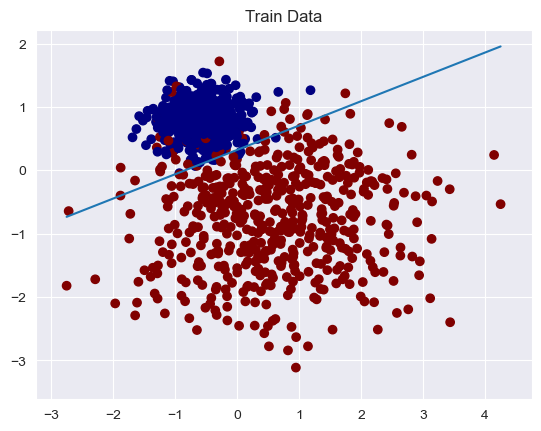

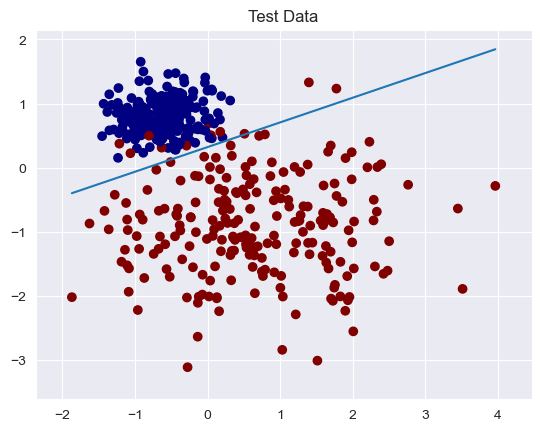

In [306]:
# Train Data
model_plot(model,X_train,y_train,'Train Data')

# Test Dataset Results
model_plot(model,X_test,y_test,'Test Data')

Above is ML: color by 0 and 1, line is classifier

In [168]:
model.eval()

LogisticRegression(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

In [169]:
with torch.no_grad():
    predictions = model(X_tensor).round()

In [170]:
y_pred = predictions.numpy().flatten()
y_true = y_tensor.numpy().flatten()

In [172]:
y_pred

array([1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.],
      dtype=float32)

In [173]:
y_true

array([1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.],
      dtype=float32)

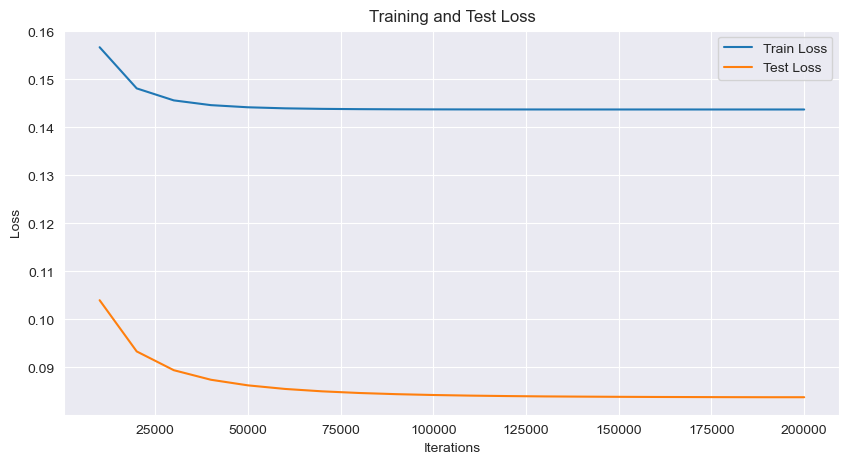

In [179]:
# Plotting Loss
plt.figure(figsize=(10, 5))
plt.plot(Iterations, losses, label='Train Loss')
plt.plot(Iterations, losses_test, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()